In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
df = pd.read_csv('data/webmd.csv')
df['Date'] = df['Date'].astype('datetime64[ns]')
df = df.drop_duplicates('Reviews')
df_ost = df.loc[df['Condition'].str.contains("Osteoporosis", case=False)]
df_ost.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1357 entries, 4147 to 360371
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Age            1357 non-null   object        
 1   Condition      1357 non-null   object        
 2   Date           1357 non-null   datetime64[ns]
 3   Drug           1357 non-null   object        
 4   DrugId         1357 non-null   int64         
 5   EaseofUse      1357 non-null   int64         
 6   Effectiveness  1357 non-null   int64         
 7   Reviews        1357 non-null   object        
 8   Satisfaction   1357 non-null   int64         
 9   Sex            1357 non-null   object        
 10  Sides          1357 non-null   object        
 11  UsefulCount    1357 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(6)
memory usage: 137.8+ KB


In [3]:
bin_age = []

for age in df_ost['Age']:
    if age == '7-12':
        bin_age.append('0-44')
    elif age == '13-18':
        bin_age.append('0-44')
    elif age == '19-24':
        bin_age.append('0-44')
    elif age == '25-34':
        bin_age.append('0-44')
    elif age == '35-44':
        bin_age.append('0-44')
    elif age == '45-54':
        bin_age.append('45-54')
    elif age == '55-64':
        bin_age.append('55-64')
    elif age == '65-74':
        bin_age.append('65-74')
    elif age == '75 or over':
        bin_age.append('75+')
    else:
        #Combine missing values into the most frequent bin
        bin_age.append('')

df_ost['Age'] = bin_age


C:\Users\Woon.Kim\AppData\Local\Temp\ipykernel_31788\1252177156.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ost['Age'] = bin_age


# Injectables and Non-Injectables

In [4]:
injectable_drugs = ['prolia syringe','reclast bottle, infusion','zometa vial','zoledronic acid vial', 'tymlos pen injector']



infused_drugs = ['liquid calcium + vitamin d', 'oyster shell + d', 'atelvia','actonel tablet osteoporosis agents','actonel 35 mg tablet','calcium citrate 200 mg (950 mg) tablet',

       'calcium 600 mg (1,500 mg) tablet', 'calcium 600 + vitamin d',

       'calcitrate + vit d', 'citracal-vitamin d tablet',

       'citracal + d', 'citracal + d maximum', 'c calcium',

       'calcium-magnesium-zinc 333 mg-133 mg-5 mg tablet', 'vitamin d3 tablet',

 'vitamin d3', 'os-cal 500-vit d3', 'risedronate sodium', 'bio-d-mulsion forte drops', 'risedronate sodium', 'replesta',

 'duavee','viactiv', 'actical','calcitrate', 'drisdol', 'calcium 600-vit d3', 'calcium 500 + vitamin d', 'calcidol']



In [5]:
drugs_type = []
for drugs in df_ost['Drug']:
    if drugs in injectable_drugs:
        drugs_type.append("injectable")
    elif drugs in infused_drugs:
        drugs_type.append("non_injectable")
    else:
        drugs_type.append("")

df_ost["Drug_Type"] = drugs_type

C:\Users\Woon.Kim\AppData\Local\Temp\ipykernel_31788\3844266986.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ost["Drug_Type"] = drugs_type


# Repeat Rows as many times as usefulcount

In [6]:
#print('Reviews with useful count = 0: ', np.sum(df_ost['UsefulCount'] == 0))

In [7]:
#df_ost = df_ost.loc[df_ost.index.repeat(df_ost.UsefulCount)]

# Breakdown of Good and Bad Reviews

In [8]:
bad_df = df_ost[df_ost['Satisfaction']<3]
bad_df.sort_values(['Age'], ascending=[True])

good_df = df_ost[df_ost['Satisfaction'] >3]
good_df.sort_values(['Age'], ascending=[True])

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount,Drug_Type
109259,,Osteoporosis,2015-05-05,prolia syringe,154218,5,5,I am very satisfied with Prolia which I have b...,5,Female,,43,injectable
277630,,Post-Menopausal Osteoporosis Prevention,2009-03-31,fosamax,1273,5,5,I have had no problems with this medication ho...,5,,"Stomach pain , constipation , diarrhea , gas...",8,
147452,0-44,Osteoporosis,2010-11-22,"reclast bottle, infusion",148235,5,5,I too almost canceled my infusion after readin...,5,,"Nausea , tiredness, flu -like symptoms (e.g.,...",50,injectable
145437,0-44,Osteoporosis caused by Glucocorticoid Drugs,2015-10-26,"reclast bottle, infusion",148235,5,5,"I had this done in March 2015 It was painless,...",5,Female,"Nausea , tiredness, flu -like symptoms (e.g.,...",2,injectable
146418,0-44,Osteoporosis,2011-12-14,"reclast bottle, infusion",148235,5,4,"After being diagnosed with osteoporosis at 40,...",4,Female,"Nausea , tiredness, flu -like symptoms (e.g.,...",27,injectable
...,...,...,...,...,...,...,...,...,...,...,...,...,...
244651,75+,Osteoporosis,2012-08-21,actonel tablet osteoporosis agents,16383,4,5,"Male now 80, zero testosterone from(orchiectom...",5,Male,Upset stomach may occur.,8,non_injectable
244736,75+,Osteoporosis,2011-03-23,actonel tablet osteoporosis agents,16383,4,3,I began taking Foxamax ten years ago. When I w...,4,Female,Upset stomach may occur.,16,non_injectable
147557,75+,Osteoporosis,2010-06-30,"reclast bottle, infusion",148235,5,5,Had difficulty with the pills...mostly having ...,5,Female,"Nausea , tiredness, flu -like symptoms (e.g.,...",27,injectable
145627,75+,Osteoporosis,2015-01-17,"reclast bottle, infusion",148235,5,5,I am 78 years old and received this infusion 9...,5,Female,"Nausea , tiredness, flu -like symptoms (e.g.,...",33,injectable


# Unigram

In [9]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
more_stopwords = {'!','"','#','$','%','&','(',')','*','+','-','.',',','/',':',';','<','=','>','?','@','[',']','^','_','{','|','}','~', 'went', 'go', 'one', 'two', '2', '3'}
stopwords = stopwords.union(more_stopwords)

In [10]:
import nltk

In [11]:
from collections import defaultdict
from nltk.tokenize import word_tokenize
#nltk.word_tokenize(df_ost['Reviews'].iloc[0])

tokenizer = nltk.RegexpTokenizer(r"\w+")
#new_words = tokenizer.tokenize(df_ost['Reviews'].iloc[0])

In [12]:
def remove_punc(string):
    punc = '''!()-[]{};:'"\, <>./?@#$%^&*_~'''
    for ele in string:  
        if ele in punc:  
            string = string.replace(ele, "") 
    return string

In [13]:
def generate_ngrams(text, n_gram=1):
    from nltk.tokenize import word_tokenize
    tokenizer = nltk.RegexpTokenizer(r"\w+")
    #text = tokenizer.tokenize(text)

    token = [token for token in text.lower().split(" ") if token != "" if token not in stopwords]
    token = [remove_punc(i) for i in token]
    #token = [token for token in tokenizer.tokenize(text) if token != "" if token not in STOPWORDS]
    
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

In [14]:
## custom function for horizontal bar chart ##
def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y=df["word"].values[::-1],
        x=df["wordcount"].values[::-1],
        showlegend=False,
        orientation = 'h',
        marker=dict(
            color=color,
        ),
    )
    return trace

In [15]:
from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

In [16]:
## Get the bar chart from rating  8 to 10 Reviews ##
freq_dict = defaultdict(int)
for sent in bad_df["Reviews"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(50), 'blue')

## Get the bar chart from rating  4 to 7 Reviews ##
freq_dict = defaultdict(int)
for sent in good_df["Reviews"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(50), 'blue')

# Creating two subplots
fig = tools.make_subplots(rows=1, cols=2, vertical_spacing=0.04,
                          subplot_titles=["Frequent words of rating in Bad Reviews", 
                                          "Frequent words of rating in Good Reviews"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
py.iplot(fig, filename='word-plots')

c:\Users\Woon.Kim\Anaconda33\lib\site-packages\plotly\tools.py:461: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



# Bigram

In [17]:
freq_dict = defaultdict(int)
for sent in bad_df["Reviews"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(50), 'orange')

freq_dict = defaultdict(int)
for sent in good_df["Reviews"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace2 = horizontal_bar_chart(fd_sorted.head(50), 'orange')

# Creating two subplots
fig = tools.make_subplots(rows=1, cols=2, vertical_spacing=0.04,horizontal_spacing=0.15,
                          subplot_titles=["Frequent biagrams of Bad Reviews", 
                                          "Frequent biagrams of Good Reviews"])
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig['layout'].update(height=1200, width=1000, paper_bgcolor='rgb(233,233,233)', title="Bigram Count Plots")
py.iplot(fig, filename='word-plots')

c:\Users\Woon.Kim\Anaconda33\lib\site-packages\plotly\tools.py:461: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



# Trigram

In [18]:
freq_dict = defaultdict(int)
for sent in bad_df["Reviews"]:
    for word in generate_ngrams(sent,3):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(50), 'green')

freq_dict = defaultdict(int)
for sent in good_df["Reviews"]:
    for word in generate_ngrams(sent,3):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace2 = horizontal_bar_chart(fd_sorted.head(50), 'green')

# Creating two subplots
fig = tools.make_subplots(rows=1, cols=2, vertical_spacing=0.04,horizontal_spacing=0.15,
                          subplot_titles=["Frequent trigrams of Bad Reviews", 
                                          "Frequent trigrams of Good Reviews"])
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig['layout'].update(height=1200, width=1600, paper_bgcolor='rgb(233,233,233)', title="Trigram Count Plots")
py.iplot(fig, filename='word-plots')

# 4-Gram

In [19]:
freq_dict = defaultdict(int)
for sent in bad_df["Reviews"]:
    for word in generate_ngrams(sent,4):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(50), 'red')

freq_dict = defaultdict(int)
for sent in good_df["Reviews"]:
    for word in generate_ngrams(sent,4):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace2 = horizontal_bar_chart(fd_sorted.head(50), 'red')

# Creating two subplots
fig = tools.make_subplots(rows=1, cols=2, vertical_spacing=0.04,horizontal_spacing=0.15,
                          subplot_titles=["Frequent 4-grams of Bad Reviews", 
                                          "Frequent 4-grams of Good Reviews"])
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig['layout'].update(height=1200, width=1600, paper_bgcolor='rgb(233,233,233)', title="4-grams Count Plots")
py.iplot(fig, filename='word-plots')

# Demographic Analysis

In [20]:
df_ost_good_bi = good_df.loc[good_df['Reviews'].str.contains("bone density test", case=False)]
df_ost_good_bi = pd.concat([df_ost_good_bi, good_df.loc[good_df['Reviews'].str.contains("bone density scan", case=False)]])
df_ost_good_bi = pd.concat([df_ost_good_bi, good_df.loc[good_df['Reviews'].str.contains("drank lots water", case=False)]])

df_ost_bad_bi = bad_df.loc[bad_df['Reviews'].str.contains("will never take", case=False)]
df_ost_bad_bi = pd.concat([df_ost_bad_bi, bad_df.loc[bad_df['Reviews'].str.contains("bone density test", case=False)]])
df_ost_bad_bi = pd.concat([df_ost_bad_bi, bad_df.loc[bad_df['Reviews'].str.contains("take drug again", case=False)]])

## Good Bigrams Analysis

In [21]:
df_ost_good_bi.groupby(['Age'])['Satisfaction'].agg(count = "size", mean='mean').sort_values(by = ['mean'], ascending=False).reset_index()

,Age,count,mean
0,75+,5,5.000000
1,65-74,14,4.857143
2,55-64,21,4.761905
3,45-54,6,4.666667
4,0-44,1,4.000000


In [22]:
df_ost_good_bi.groupby("Sides")["Sides"].count().sort_values(ascending=False)

Sides
Nausea , tiredness,  flu -like symptoms (e.g., fever, chills, muscle/ joint  aches),  dizziness ,  headache , or pain/redness/swelling at the injection site may occur.    21
                                                                                                                                                                           13
Stomach  upset,  diarrhea , pain in arms/legs, or mild  flu -like symptoms (such as  fatigue , muscle ache) may occur.                                                      5
Hot flashes  or leg  cramps  may occur.                                                                                                                                     2
Stomach / abdominal pain ,  nausea ,  vomiting , or  diarrhea  may occur.                                                                                                   2
Upset stomach  may occur.                                                                                                   

In [52]:
#df_ost_good_bi.groupby(['Age'])['Age'].agg(count='size').sort_values(by = ['count'], ascending=False).reset_index()

<AxesSubplot:xlabel='Age', ylabel='count'>

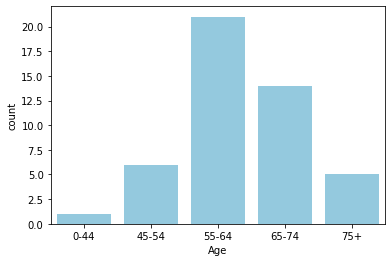

In [39]:
sns.countplot(x = 'Age', data=df_ost_good_bi, color = 'skyblue', order=["0-44", "45-54", "55-64", "65-74", "75+"])

In [55]:
df_ost_good_bi.groupby(['Drug'])['Drug'].agg(count='size').sort_values(by = ['count'], ascending=False).reset_index()

,Drug,count
0,"reclast bottle, infusion",21
1,prolia syringe,13
2,boniva,5
3,actonel tablet osteoporosis agents,2
4,atelvia,2
5,evista,2
6,actonel 35 mg tablet,1
7,bio-d-mulsion forte drops,1


In [25]:
df_ost_good_bi.groupby(['Condition'])['Condition'].agg(count='size').reset_index()

,Condition,count
0,Osteoporosis,37
1,Post-Menopausal Osteoporosis Prevention,10


In [26]:
df_ost_good_bi.groupby(['Age', 'Drug'])['Age'].agg(count='size').sort_values(by = ['count'], ascending=False).reset_index()

,Age,Drug,count
0,55-64,prolia syringe,8
1,55-64,"reclast bottle, infusion",8
2,65-74,"reclast bottle, infusion",8
3,45-54,"reclast bottle, infusion",4
4,65-74,prolia syringe,3
5,55-64,boniva,3
6,55-64,atelvia,2
7,75+,evista,2
8,0-44,actonel tablet osteoporosis agents,1
9,75+,prolia syringe,1


<AxesSubplot:xlabel='count', ylabel='Drug'>

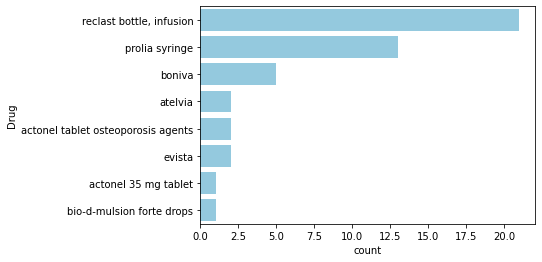

In [58]:
sns.countplot(y = 'Drug', data=df_ost_good_bi, color = 'skyblue', order = df_ost_good_bi['Drug'].value_counts().index)

## Bad Bigrams Analysis

In [27]:
df_ost_bad_bi.groupby(['Age'])['Satisfaction'].agg(count = "size", mean='mean').sort_values(by = ['mean'], ascending=True).reset_index()

,Age,count,mean
0,0-44,2,1.000000
1,75+,3,1.000000
2,65-74,19,1.052632
3,55-64,17,1.058824
4,45-54,13,1.076923


In [28]:
df_ost_bad_bi.groupby("Sides")["Sides"].count().sort_values(ascending=False)

Sides
Nausea , tiredness,  flu -like symptoms (e.g., fever, chills, muscle/ joint  aches),  dizziness ,  headache , or pain/redness/swelling at the injection site may occur.    18
                                                                                                                                                                           14
Upset stomach  may occur.                                                                                                                                                   9
Stomach / abdominal pain ,  nausea ,  vomiting , or  diarrhea  may occur.                                                                                                   5
Hot flashes  or leg  cramps  may occur.                                                                                                                                     3
Stomach  upset may occur.                                                                                                   

In [59]:
#df_ost_bad_bi.groupby(['Age'])['Age'].agg(count='size').sort_values(by = ['count'], ascending=False).reset_index()

<AxesSubplot:xlabel='Age', ylabel='count'>

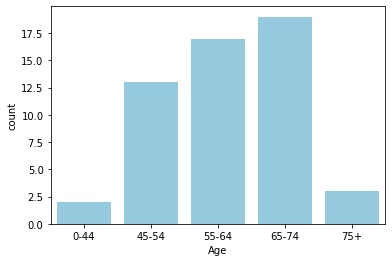

In [38]:
sns.countplot(x = 'Age', data=df_ost_bad_bi, color = 'skyblue', order=["0-44", "45-54", "55-64", "65-74", "75+"])

In [60]:
df_ost_bad_bi.groupby(['Drug'])['Drug'].agg(count='size').sort_values(by=['count'], ascending = False).reset_index()

,Drug,count
0,"reclast bottle, infusion",18
1,prolia syringe,14
2,actonel tablet osteoporosis agents,9
3,atelvia,5
4,actonel 35 mg tablet,3
5,evista,3
6,alendronate sodium tablet osteoporosis agents,1
7,boniva,1


In [32]:
df_ost_bad_bi.groupby(['Condition'])['Condition'].agg(count='size').reset_index()

,Condition,count
0,Aromatase Inhibitor Drug-Induced Osteoporosis,3
1,Glucocorticoid-Induced Osteoporosis Prevention,3
2,Osteoporosis,38
3,Post-Menopausal Osteoporosis Prevention,10


In [33]:
df_ost_bad_bi.groupby(['Age', 'Drug'])['Age'].agg(count='size').sort_values(by = ['count'], ascending=False).reset_index()

,Age,Drug,count
0,65-74,"reclast bottle, infusion",9
1,65-74,prolia syringe,7
2,55-64,"reclast bottle, infusion",6
3,45-54,actonel tablet osteoporosis agents,4
4,55-64,prolia syringe,4
5,0-44,actonel tablet osteoporosis agents,2
6,55-64,atelvia,2
7,45-54,actonel 35 mg tablet,2
8,55-64,evista,2
9,45-54,"reclast bottle, infusion",2


<AxesSubplot:xlabel='count', ylabel='Drug'>

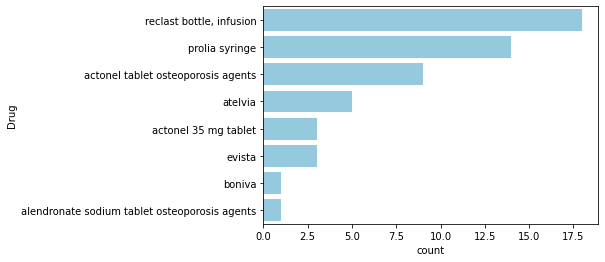

In [64]:
sns.countplot(y = 'Drug', data=df_ost_bad_bi, color = 'skyblue',  order = df_ost_bad_bi['Drug'].value_counts().index)

# Zero-Shot Classification --- Work in Progress

In [34]:
df_ost = df_ost.reset_index()

In [35]:
"""from transformers import pipeline

df_ost['infusion'] = ''
df_ost['side_effect'] = ''
df_ost['efficacy'] = ''


classifier = pipeline("zero-shot-classification")

for reviews, row in df_ost.iterrows():
    a = classifier(
        df_ost['Reviews'][reviews],
        candidate_labels=["infusion", "side effect", "efficacy", ],)
        
    a = pd.DataFrame.from_dict(a)

    df_ost['infusion'][reviews] = a.iloc[0,2]
    df_ost['side_effect'][reviews] = a.iloc[1,2]
    df_ost['efficacy'][reviews] = a.iloc[2,2]"""

'from transformers import pipeline\n\ndf_ost[\'infusion\'] = \'\'\ndf_ost[\'side_effect\'] = \'\'\ndf_ost[\'efficacy\'] = \'\'\n\n\nclassifier = pipeline("zero-shot-classification")\n\nfor reviews, row in df_ost.iterrows():\n    a = classifier(\n        df_ost[\'Reviews\'][reviews],\n        candidate_labels=["infusion", "side effect", "efficacy", ],)\n        \n    a = pd.DataFrame.from_dict(a)\n\n    df_ost[\'infusion\'][reviews] = a.iloc[0,2]\n    df_ost[\'side_effect\'][reviews] = a.iloc[1,2]\n    df_ost[\'efficacy\'][reviews] = a.iloc[2,2]'

In [36]:
df_ost

,index,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount,Drug_Type
0,4147,0-44,Osteoporosis,2010-03-16,lotensin,6883,4,3,this treatment is awsome. I love drugs.,2,Male,"Dizziness , lightheadedness , drowsiness, or ...",0,
1,6192,45-54,Post-Menopausal Osteoporosis Prevention,2017-07-31,lopreeza,167327,5,2,After taking this drug for approx. 21 days I s...,3,Male,"Stomach upset, nausea / vomiting , bloating...",0,
2,6207,45-54,Post-Menopausal Osteoporosis Prevention,2016-12-29,lopreeza,167327,5,5,I have taken this drug for almost 7 years with...,5,Female,"Stomach upset, nausea / vomiting , bloating...",1,
3,18993,65-74,Osteoporosis,2010-05-26,liquid calcium + vitamin d,93396,5,5,since I have a hard time swallowing this hs wo...,5,Female,Constipation or stomach upset may occur.,1,non_injectable
4,61145,45-54,Osteoporosis,2012-01-19,oyster shell + d,94390,1,1,I have severe pain in my hand and muscle joint...,1,Female,Constipation or stomach upset may occur.,2,non_injectable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1352,360231,55-64,Osteoporosis,2010-11-15,calcium 600 + vitamin d,93224,4,5,The only thing I have to say against these tab...,4,Female,Constipation or stomach upset may occur.,11,non_injectable
1353,360237,55-64,Osteoporosis,2016-03-16,calcium 500 + vitamin d,151589,4,4,Just started taking this a month ago. Definite...,4,,Constipation or stomach upset may occur.,1,non_injectable
1354,360264,55-64,Osteoporosis,2012-03-08,calcitrate + vit d,19844,3,3,"This supplement has caused much gas, bloating,...",1,Female,Constipation or stomach upset may occur.,2,non_injectable
1355,360298,65-74,Osteoporosis,2012-07-24,calcitrate,22129,1,1,first dose: one tablet knocked me out cold for...,1,Female,Constipation and upset stomach may occur.,1,non_injectable
